In [273]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import seaborn as sns

from sklearn import linear_model
from sklearn import feature_selection, linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

In [141]:
df = pd.read_csv('auto-mpg.csv')

In [142]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [143]:
df.drop(['car_name'],axis=1,inplace=True)

In [144]:
df=df.dropna()

In [145]:
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

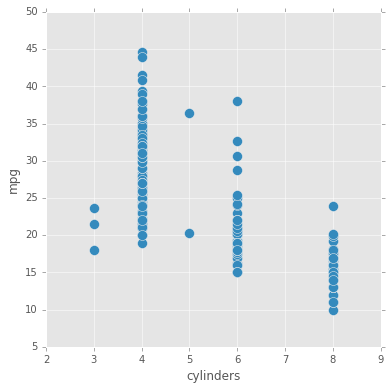

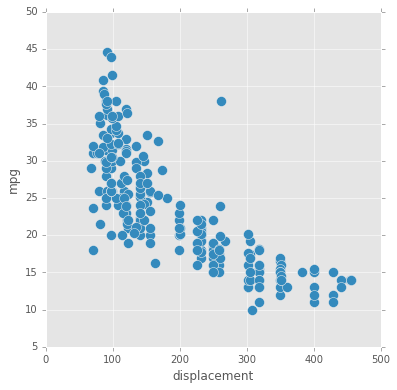

In [122]:
train_df.plot(kind='scatter',x='cylinders', y='mpg', s=100,figsize=(6,6))


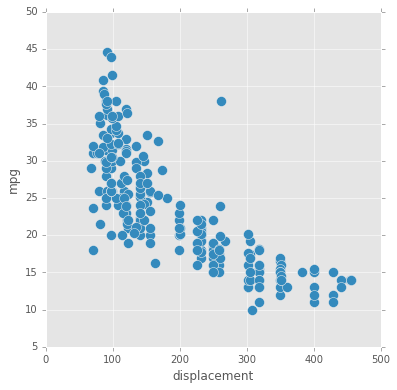

In [123]:
train_df.plot(kind='scatter',x='displacement', y='mpg', s=100,figsize=(6,6))


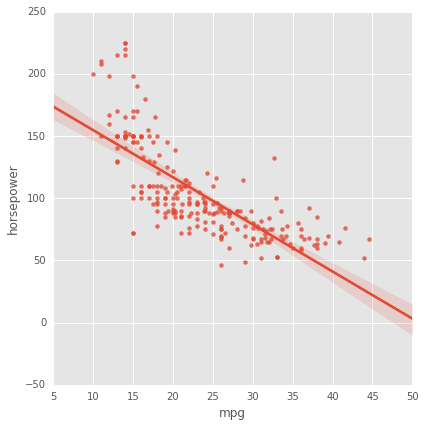

In [134]:
sns.lmplot('mpg','horsepower',train_df,size=6)


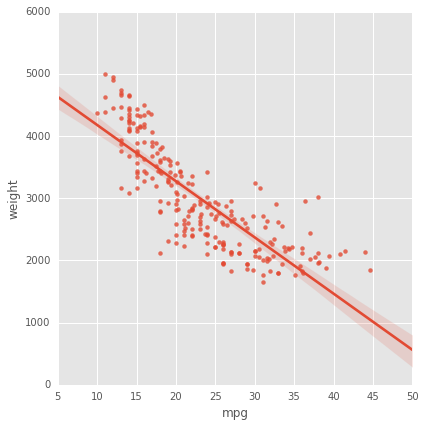

In [135]:
sns.lmplot('mpg','weight',train_df,size=6)


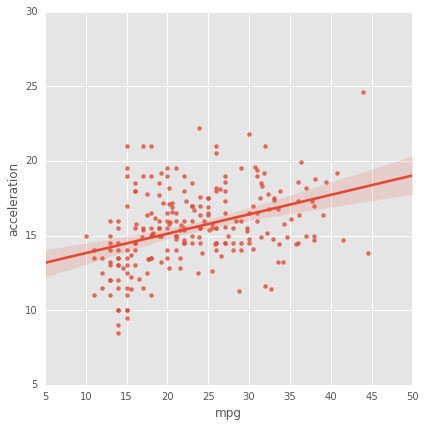

In [136]:
sns.lmplot('mpg','acceleration',train_df,size=6)


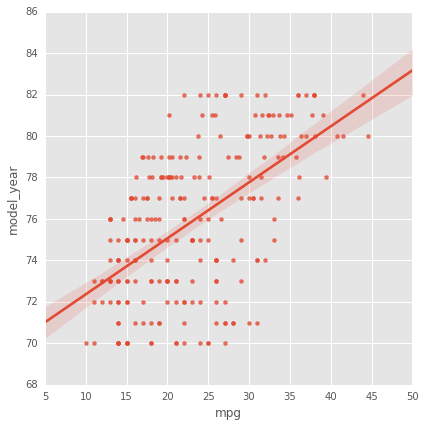

In [137]:
sns.lmplot('mpg','model_year',train_df,size=6)


In [197]:
train_plot=train_df[['mpg','cylinders',
 'displacement',
 'horsepower']]

from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d90cda90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1be1b0f10>]], dtype=object)

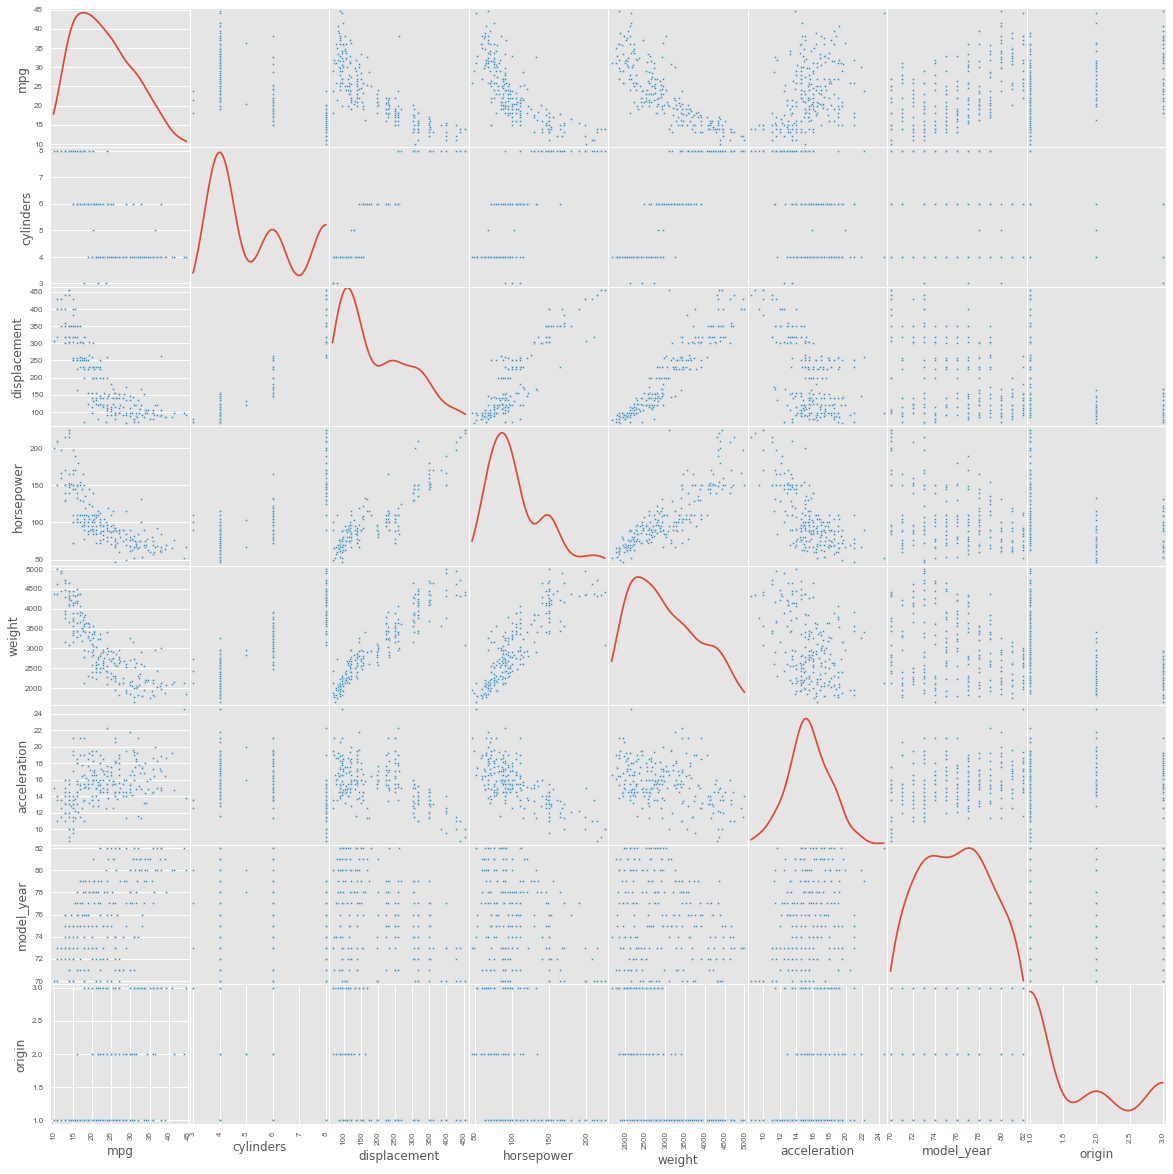

In [162]:
scatter_matrix(train_df,alpha=1,figsize=(20,20),diagonal='kde')

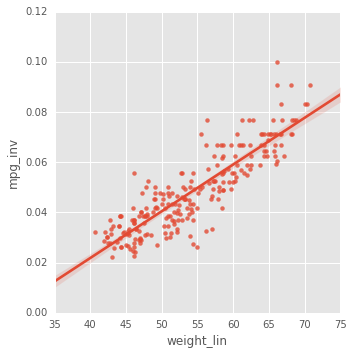

In [251]:
train_df['weight_lin']=train_df['weight']**0.5
train_df['displacement_lin']=train_df['displacement']**0.5
train_df['horse_power_lin']=train_df['horsepower']**0.5
train_df['weight_frac']=1/train_df['weight']
#train_df['weight_ln']=exp^train_df['weight']

train_df['mpg_inv']=1/train_df['mpg']


#train_df
sns.lmplot('weight_lin','mpg_inv',train_df,size=5)
#train_df.weight_frac.plot(kind='hist')


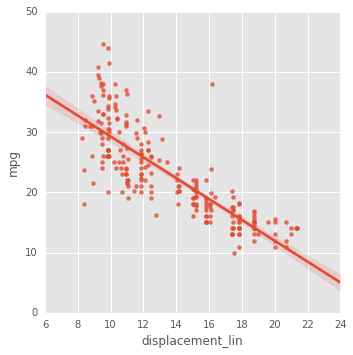

In [183]:
sns.lmplot('displacement_lin','mpg',train_df,size=5)


In [108]:
#df['default_no']=df.default.apply(lambda value: 1 if value== "no" else 0)
df['origin_two']=df.origin.apply(lambda value: 1 if value==2 else 0)

/Users/libbyalthea/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model_year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

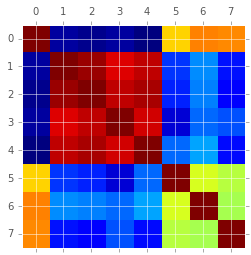

In [84]:
corr=df.corr()
print corr
plt.matshow(corr)

In [186]:
X=train_df.drop(['mpg'], axis=1)

In [86]:
X=train_df[['cylinders','displacement','horsepower']]
X.count()

cylinders       392
displacement    392
horsepower      392
dtype: int64

In [187]:
y=train_df.mpg


In [188]:
def summary(X, y, model):
    fvalues, f_pvalues = feature_selection.f_regression(X, y)
    print 'F-statistic (not join but instead done sequentially for each regressor)'
    print '- F-value', fvalues
    print '- p-value', f_pvalues
    print

    print 'R^2 =', model.score(X, y)
    print

    print 'Coefficients'
    print '- beta_0 (Intercept) = {}'.format(model.intercept_)
    for i, coef in enumerate(model.coef_):
        print '- beta_{} ({}) = {}'.format(i + 1, X.columns[i], coef)

In [189]:
modelskl=linear_model.LinearRegression().fit(X,y)

In [190]:
summary(X,y,modelskl)

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 335.89993957  416.7873728   318.38062042  481.35749837   39.56166702
  108.62608778  113.06575348  405.22546629  508.4542603   464.49906671
  372.821437  ]
- p-value [  4.63682068e-47   8.36198700e-54   1.79296444e-45   1.31348924e-58
   1.55571551e-09   3.99021621e-21   8.74915202e-22   6.80545711e-53
   1.70218130e-60   2.13444590e-57   2.99147342e-50]

R^2 = 0.856309416702

Coefficients
- beta_0 (Intercept) = -31.5018956313
- beta_1 (cylinders) = 0.407100394716
- beta_2 (displacement) = -0.00412581389187
- beta_3 (horsepower) = 0.316372975827
- beta_4 (weight) = -0.0562033794356
- beta_5 (acceleration) = -0.304342171378
- beta_6 (model_year) = 0.774492625384
- beta_7 (origin) = 0.679162175325
- beta_8 (weight_sq) = 3.41229269882e-06
- beta_9 (weight_lin) = 3.38775489714
- beta_10 (displacement_lin) = -0.0484177177629
- beta_11 (horse_power) = -8.20267780488


In [191]:
print modelskl.intercept_
print modelskl.coef_

-31.5018956313
[  4.07100395e-01  -4.12581389e-03   3.16372976e-01  -5.62033794e-02
  -3.04342171e-01   7.74492625e-01   6.79162175e-01   3.41229270e-06
   3.38775490e+00  -4.84177178e-02  -8.20267780e+00]


In [192]:
modelskl.score(X,y)

0.8563094167020312

In [193]:
#dir(model)
X

,cylinders,displacement,horsepower,weight,acceleration,...,origin,weight_sq,weight_lin,displacement_lin,horse_power
146,4,90.0,75.0,2125.0,14.5,...,1,4515625.0,46.097722,9.486833,8.660254
282,4,140.0,88.0,2890.0,17.3,...,1,8352100.0,53.758720,11.832160,9.380832
69,8,350.0,160.0,4456.0,13.5,...,1,19855936.0,66.753277,18.708287,12.649111
378,4,105.0,63.0,2125.0,14.7,...,1,4515625.0,46.097722,10.246951,7.937254
331,4,97.0,67.0,2145.0,18.0,...,3,4601025.0,46.314145,9.848858,8.185353
...,...,...,...,...,...,...,...,...,...,...,...
111,3,70.0,90.0,2124.0,13.5,...,3,4511376.0,46.086874,8.366600,9.486833
151,4,79.0,67.0,2000.0,16.0,...,2,4000000.0,44.721360,8.888194,8.185353
159,8,351.0,148.0,4657.0,13.5,...,1,21687649.0,68.242216,18.734994,12.165525
154,6,250.0,72.0,3432.0,21.0,...,1,11778624.0,58.583274,15.811388,8.485281


In [200]:
model_all=smf.ols(formula='y~cylinders+displacement_lin+horse_power_lin+weight_lin+acceleration+model_year+origin',data=train_df).fit()
    

In [201]:
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     154.1
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           1.57e-82
Time:                        20:28:31   Log-Likelihood:                -604.73
No. Observations:                 235   AIC:                             1225.
Df Residuals:                     227   BIC:                             1253.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            8.2114      6.359      1.291      0.198        -4.318    20.741
cylinders            0.1695      0.397      0.427      0.670        -0.613     0.952
displacement_lin     0.1577      0.276      0.571      0.569        -0.387     0.702
horse_power_lin     -1.0263      0.388     -2.644      0.009        -1.791    -0.261
weight_lin          -0.5951      0.097     -6.110      0.000        -0.787    -0.403
acceleration        -0.2191      0.136     -1.606      0.110        -0.488     0.050
model_year           0.7386      0.064     11.520      0.000         0.612     0.865
origin               1.1407      0.374      3.054      0.003         0.405     1.877
==============================================================================
Omnibus:                       13.339   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.120
Skew:                           0.383   Prob(JB):                     7.05e-05
Kurtosis:                       4.169   Cond. No.                     2.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
model=smf.ols(formula='y~weight_lin+model_year+origin',data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     351.6
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           8.40e-86
Time:                        20:28:56   Log-Likelihood:                -608.56
No. Observations:                 235   AIC:                             1225.
Df Residuals:                     231   BIC:                             1239.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3117      5.395      0.058      0.954       -10.318    10.941
weight_lin    -0.6798      0.036    -19.125      0.000        -0.750    -0.610
model_year     0.7675      0.060     12.696      0.000         0.648     0.887
origin         0.8854      0.329      2.688      0.008         0.236     1.534
==============================================================================
Omnibus:                       12.138   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.924
Skew:                           0.336   Prob(JB):                     0.000128
Kurtosis:                       4.174   Cond. No.                     2.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
model1=smf.ols(formula='y~displacement_lin',data=train_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     464.5
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           2.13e-57
Time:                        20:29:30   Log-Likelihood:                -681.45
No. Observations:                 235   AIC:                             1367.
Df Residuals:                     233   BIC:                             1374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           46.5965      1.126     41.369      0.000        44.377    48.816
displacement_lin    -1.7321      0.080    -21.552      0.000        -1.890    -1.574
==============================================================================
Omnibus:                       31.968   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.389
Skew:                           0.715   Prob(JB):                     1.27e-13
Kurtosis:                       5.005   Cond. No.                         55.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

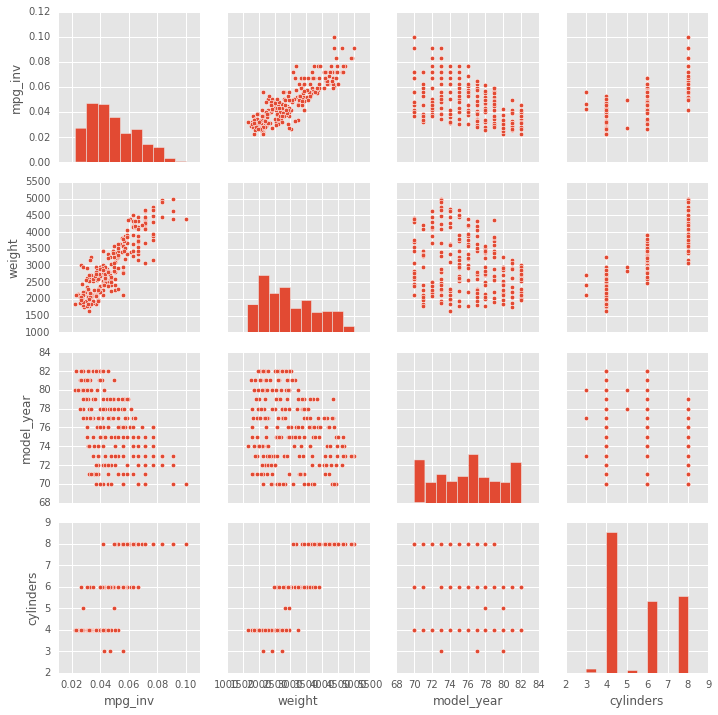

In [257]:
#sns.pairplot(train_df[['mpg_inv','weight','model_year','cylinders']],hue='cylinders')
sns.pairplot(train_df[['mpg_inv','weight','model_year','cylinders']])

In [267]:
col_list = ['cylinders',
 'acceleration',
 'model_year',
 'origin',
 'weight',
 'displacement',
 'horse_power']
 
#I made 3 item group combinations for the list using itertools

import itertools
from itertools import combinations
 
combos = itertools.combinations(col_list, 5)
combo_list = [i for i in combos]
#combo_list

for i in combo_list:
    formula = "mpg_inv ~0+ {0} + {1} + {2}".format(i[0], i[1], i[2])
    model = smf.ols(formula = formula, data = train_df).fit()
    print "R2: {0} is {1} ".format(formula, model.rsquared)

R2: mpg_inv ~0+ cylinders + acceleration + model_year is 0.969944594109 
R2: mpg_inv ~0+ cylinders + acceleration + model_year is 0.969944594109 
R2: mpg_inv ~0+ cylinders + acceleration + model_year is 0.969944594109 
R2: mpg_inv ~0+ cylinders + acceleration + model_year is 0.969944594109 
R2: mpg_inv ~0+ cylinders + acceleration + model_year is 0.969944594109 
R2: mpg_inv ~0+ cylinders + acceleration + model_year is 0.969944594109 
R2: mpg_inv ~0+ cylinders + acceleration + origin is 0.970010209726 
R2: mpg_inv ~0+ cylinders + acceleration + origin is 0.970010209726 
R2: mpg_inv ~0+ cylinders + acceleration + origin is 0.970010209726 
R2: mpg_inv ~0+ cylinders + acceleration + weight is 0.978816359918 
R2: mpg_inv ~0+ cylinders + model_year + origin is 0.969639530606 
R2: mpg_inv ~0+ cylinders + model_year + origin is 0.969639530606 
R2: mpg_inv ~0+ cylinders + model_year + origin is 0.969639530606 
R2: mpg_inv ~0+ cylinders + model_year + weight is 0.979243506991 
R2: mpg_inv ~0+ cy

In [268]:
combos = itertools.combinations(col_list, 3)
model_dict = {}
for i in combo_list:
    formula = "mpg_inv ~0+ {0} + {1} + {2}".format(i[0], i[1], i[2], i[3])
    model = smf.ols(formula = formula, data = train_df).fit()
    model_dict[formula] = model.rsquared

sorted(model_dict.items(), key=lambda x:x[1], reverse=True)

[('mpg_inv ~0+ cylinders + model_year + weight', 0.97924350699144924),
 ('mpg_inv ~0+ cylinders + acceleration + weight', 0.97881635991828542),
 ('mpg_inv ~0+ cylinders + origin + weight', 0.97868806218941695),
 ('mpg_inv ~0+ model_year + origin + weight', 0.97833873029125762),
 ('mpg_inv ~0+ acceleration + model_year + weight', 0.97830710409923338),
 ('mpg_inv ~0+ acceleration + origin + weight', 0.97793298706036336),
 ('mpg_inv ~0+ cylinders + acceleration + origin', 0.97001020972605467),
 ('mpg_inv ~0+ cylinders + acceleration + model_year', 0.96994459410917933),
 ('mpg_inv ~0+ cylinders + model_year + origin', 0.96963953060602781),
 ('mpg_inv ~0+ acceleration + model_year + origin', 0.91330119462336101)]

In [264]:
model=smf.ols(formula='mpg_inv ~ cylinders + model_year + weight+cylinders*model_year+model_year*weight+cylinders*model_year+cylinders*weight',data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mpg_inv   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     264.9
Date:                Mon, 15 Aug 2016   Prob (F-statistic):          8.73e-100
Time:                        21:19:15   Log-Likelihood:                 880.94
No. Observations:                 235   AIC:                            -1748.
Df Residuals:                     228   BIC:                            -1724.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0400      0.037      1.073      0.285        -0.034     0.114
cylinders                0.0021      0.011      0.194      0.846        -0.019     0.023
model_year              -0.0005      0.000     -1.075      0.283        -0.001     0.000
weight                3.513e-05   2.62e-05      1.343      0.181     -1.64e-05  8.67e-05
cylinders:model_year -1.376e-05      0.000     -0.095      0.925        -0.000     0.000
model_year:weight     -2.88e-07   3.31e-07     -0.871      0.385      -9.4e-07  3.64e-07
cylinders:weight     -2.247e-08   4.23e-07     -0.053      0.958     -8.56e-07  8.11e-07
==============================================================================
Omnibus:                       34.161   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.917
Skew:                           0.806   Prob(JB):                     4.37e-13
Kurtosis:                       4.792   Cond. No.                     2.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
model=smf.ols(formula='mpg_inv ~0+cylinders + model_year + weight',data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mpg_inv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3648.
Date:                Mon, 15 Aug 2016   Prob (F-statistic):          7.44e-195
Time:                        21:19:49   Log-Likelihood:                 821.98
No. Observations:                 235   AIC:                            -1638.
Df Residuals:                     232   BIC:                            -1628.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
cylinders      0.0022      0.001      3.353      0.001         0.001     0.003
model_year -6.671e-05   2.21e-05     -3.013      0.003        -0.000 -2.31e-05
weight      1.372e-05   1.31e-06     10.454      0.000      1.11e-05  1.63e-05
==============================================================================
Omnibus:                       11.014   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.991
Skew:                           0.309   Prob(JB):                     0.000337
Kurtosis:                       4.119   Cond. No.                     4.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [269]:
train_X=train_df[['cylinders','model_year','weight']]
train_y=train_df['mpg_inv']

In [279]:
from sklearn import feature_selection, linear_model
model=linear_modeling_with_sklearn(train_X,train_y)
#cross_validation.cross_val_score(model,train_X,train_y,cv=10)

NameError: name 'linear_modeling_with_sklearn' is not defined